# Pixel Proficiency 1b
## CNN for Image Classification

*Author: Valentina Staneva*

Adapted from https://keras.io/examples/vision/mnist_convnet/, by [François Chollet](https://fchollet.com/)



### Goals:
- Download and understand image data
- Prepare data for training
- Train a convolutional neural network (CNN) with Keras
- Check performance




## Load libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Load the MNIST Digits dataset

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Prepare data for training

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
input_shape = x_train[0,:,:,:].shape

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Note: we do not flatten the image because Conv2D layer accepts 2D images.

## Train a CNN

We define a model with 2 convolutional layers, each followed by ReLU activation function and max pooling. A final fully connected layer links to the class labels.

In [ ]:
# @title Define the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        # CNN Block 1
        Conv2D(filters=32,
                      kernel_size=(3, 3),
                      activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),

        # CNN Block 2
        Conv2D(filters=32,
                      kernel_size=(3, 3),
                      activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),

        # Dense Block
        Flatten(),
        Dense(num_classes,
                     activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,578 (68.66 KB)

 Trainable params: 17,578 (68.66 KB)

 Non-trainable params: 0 (0.00 B)

Note: we did not flatten the image in the beginning, but we need to flatten the last layer before the dense layer since that expects a flat array.

In [ ]:
# @title Define the loss and the evaluation metrics
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# @title Fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7993 - loss: 0.7103 - val_accuracy: 0.9622 - val_loss: 0.1293
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9652 - loss: 0.1135 - val_accuracy: 0.9759 - val_loss: 0.0794
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9765 - loss: 0.0784 - val_accuracy: 0.9723 - val_loss: 0.0888
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9816 - loss: 0.0589 - val_accuracy: 0.9825 - val_loss: 0.0587
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9853 - loss: 0.0476 - val_accuracy: 0.9813 - val_loss: 0.0650
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9869 - loss: 0.0448 - val_accuracy: 0.9822 - val_loss: 0.0545
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9863 - val_loss: 0.0459
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0.

## Evaluate the trained model

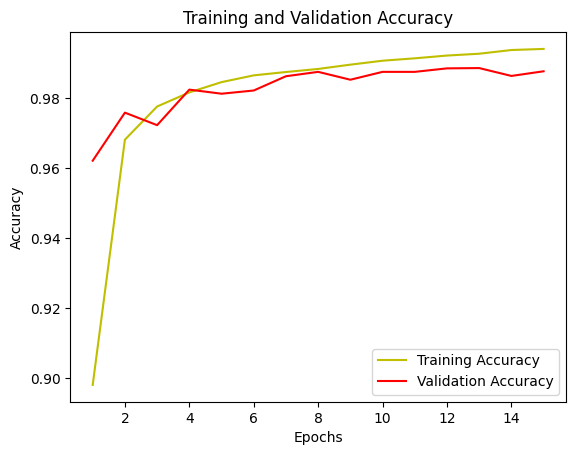

In [ ]:
# @title Training and Validation Accuracy
epochs = range(1, len(history.history["accuracy"]) + 1)
plt.plot(epochs, history.history["accuracy"], 'y', label='Training Accuracy')
plt.plot(epochs, history.history["val_accuracy"], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# @title Test Accuracy
test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print("Test accuracy:", test_accuracy)

Test accuracy: 0.9886000156402588


In [ ]:
# @title Prediction on test set
y_pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

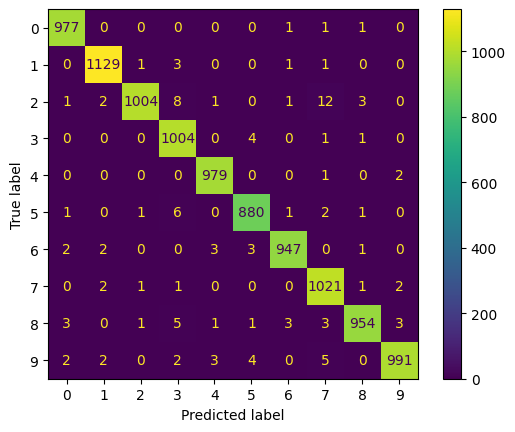

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1),
                                              y_pred.argmax(axis=1),
                                              display_labels=np.arange(10),
                                              #normalize='pred',
                                              )